In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import AutomationModule as AM
from scipy.optimize import curve_fit
from natsort import natsorted




In [ ]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [ ]:
a=5/3

In [ ]:
slices = [0.1,0.3,0.5,0.7,0.9]
for path_direction in [
                       "RCP Sample 1 Slices SAL/z_incidence"
                      
                       ]:

      folder_path = f"data/{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                a = 5/3

                flux_t = sim_data["time_monitorT"].flux

                plt.scatter(flux_t['t'][:]*1e12,flux_t[:],s=0.5,label=f"L={slices[i]}L")
               


range = f'lambda_range: {a/structure_1.monitor_lambdas[-1]:.3g} - {a/structure_1.monitor_lambdas[0]:.3g}'

plt.ylabel("Flux")
plt.xlabel("Time[ps]")
plt.title("Range: "+range)
plt.legend()
plt.grid()
plt.show()



In [ ]:
slices = [0.1,0.3,0.5,0.7,0.9]


def line_fit(x,m,b):
    return m*x+b




for path_direction in [
                       "RCP Sample 1 Slices SAL/z_incidence"
                      
                       ]:

      folder_path = f"data/{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                a = 5/3

                flux_t = sim_data["time_monitorT"].flux
                flux_index = np.argmax(flux_t.values)
                x,y = flux_t['t'][flux_index:]*1e12,np.log(flux_t[flux_index:])
                # Remove NaN and inf values
                mask = np.isfinite(y)
                x_clean = x[mask]
                y_clean = y[mask]

                popt, pcov = curve_fit(line_fit, x_clean, y_clean)
                plt.scatter(x_clean,y_clean,s=0.5,label=f"L={slices[i]:.3g}L - slope:{popt[0]:.3g}")
               


range = f'lambda_range: {a/structure_1.monitor_lambdas[0]:.3g} - {a/structure_1.monitor_lambdas[-1]:.3g}'

plt.ylabel("Log(Flux)")
plt.xlabel("Time[ps]")
plt.title("Range: "+range)
plt.legend()
plt.grid()
plt.show()



In [ ]:
for path_direction in [
                       "RCP Sample SAL Tight Beam 2/z_incidence"
                      
                       ]:

      folder_path = f"data/{path_direction}"

      
      for i,filename in enumerate(natsorted(os.listdir(folder_path))):
            print(filename)
            
            if not Path(filename).suffix==".txt":
                  continue
            
            if os.path.isfile(os.path.join(folder_path, filename)):
                file=os.path.join(folder_path, filename)
                structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
                sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
                a = 5/3

                field_time_out = sim_data.get_intensity("time_monitorFieldOut")
                field_time_center = sim_data.get_intensity("time_monitorFieldCenter")
                for i,time in enumerate(field_time_out['t']):
                    if i%5==0:
                        np.log10(field_time_out).isel(t=i).squeeze().plot.pcolormesh()
                        plt.show()
                        np.log10(field_time_center).isel(t=i).squeeze().plot.pcolormesh()
                        plt.show()





In [42]:
field_time_center



<xarray.DataArray '|E|²' (x: 832, y: 832, z: 1, t: 101)> Size: 280MB
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2417222e-05, 9.8992614e-06, 2.8204129e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.4603843e-05, 6.4877640e-06, 3.2896216e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          4.0318970e-05, 4.6361733e-06, 3.8371003e-05]],

        ...,

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.5075296e-05, 2.0215968e-05, 2.1924470e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2846736e-05, 1.4582518e-05, 2.4463583e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2417222e-05, 9.8992614e-06, 2.8204129e-05]]],

...

       [[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2417222e-05, 9.8992614e-06, 2.8204129e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.4603843e-05, 6.4877640e-06, 3.2896216e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          4.0318970e-05, 4.6361733e-06, 3.8371003e-05]],

        ...,

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.5075296e-05, 2.0215968e-05, 2.1924470e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2846736e-05, 1.4582518e-05, 2.4463583e-05]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.2417222e-05, 9.8992614e-06, 2.8204129e-05]]]], dtype=float32)
Coordinates:
  * x        (x) float64 7kB -15.01 -14.97 -14.94 -14.9 ... 14.94 14.97 15.01
  * y        (y) float64 7kB -15.01 -14.97 -14.94 -14.9 ... 14.94 14.97 15.01
  * z        (z) float64 8B 0.0
  * t        (t) float64 808B 0.0 1.157e-14 2.314e-14 ... 1.145e-12 1.157e-12

In [47]:
#Compute beam diameter d(t)
import scipy.integrate


def diameter(intensity_array):
    x,y = intensity_array['x'],intensity_array['y']
    intensity = intensity_array.values
    integral_1 = scipy.integrate.trapezoid(scipy.integrate.trapezoid(intensity, x=y, axis=0), x=x, axis=0)**2
    integral_2 = scipy.integrate.trapezoid(scipy.integrate.trapezoid(intensity**2, x=y, axis=0), x=x, axis=0)

    return 2*np.sqrt((integral_1/integral_2)/np.pi)



C:\Users\HernandF\AppData\Local\Temp\ipykernel_24984\3422561948.py:11: RuntimeWarning: invalid value encountered in divide
  return 2*np.sqrt((integral_1/integral_2)/np.pi)


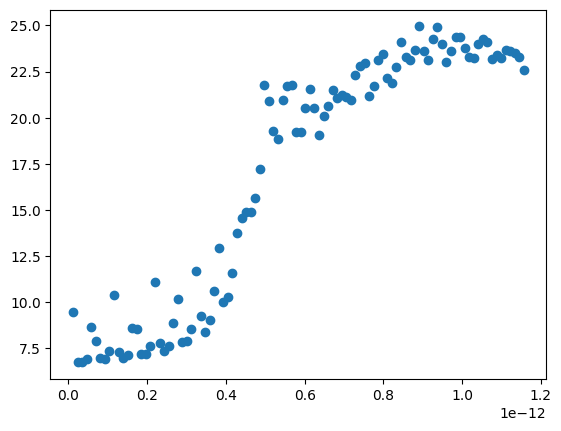

In [48]:
plt.scatter(field_time_center['t'] ,diameter(field_time_out).squeeze())